In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,3:4].values

In [5]:
from sklearn.cluster import SpectralClustering
clust = SpectralClustering (n_clusters=5)
mode_l = clust.fit_predict(X)

C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 1729 with accuracies 
[3.72983325e-13 6.98384673e-07 2.65208568e-07 1.32247858e-06
 2.95796196e-06 7.65739994e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 982 instead with accuracy 
1.623859533700631e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[4.39292791e-13 7.29958423e-07 2.82314442e-07 1.42342565e-06
 4.75499968e-06 2.55228096e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
supervised['Cluster_group'] = mode_l

C:\Anaconda\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


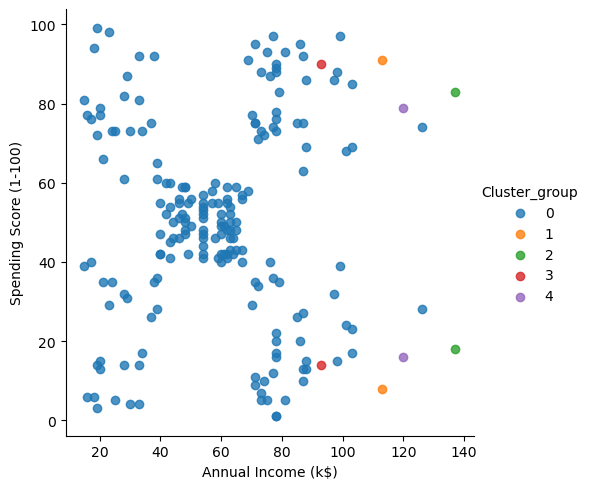

In [8]:
import seaborn as sb
facets= sb.lmplot(data = supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],fit_reg=False,legend_out=True)

In [9]:
from sklearn import metrics
labels = clust.labels_

In [10]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels) 

0.41184156456092513

In [11]:
metrics.calinski_harabasz_score(X, labels)


12.141394100092903

In [13]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.1534750450338883